In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pylab as plt


In [2]:
df = pd.read_excel('resturant (1).xlsx')

In [6]:
df.drop(['url','address','phone','reviews_list','menu_item','listed_in(city)'],inplace=True,axis=1)

In [7]:
after_dropping_duplicate = df.drop_duplicates()

In [11]:
top_cafes = after_dropping_duplicate.groupby("name")[['votes']].mean().sort_values(by="votes", ascending=False).head(10).reset_index()


In [12]:
top_cafes

,name,votes
0,Byg Brewski Brewing Company,16588.500000
1,Toit,14956.000000
2,The Black Pearl,9562.333333
3,Big Pitcher,9164.500000
4,Arbor Brewing Company,8396.545455
5,Prost Brew Pub,7861.666667
6,Church Street Social,7561.727273
7,Hoot,7257.000000
8,Truffles,7139.952381
9,The Hole in the Wall Cafe,7124.875000


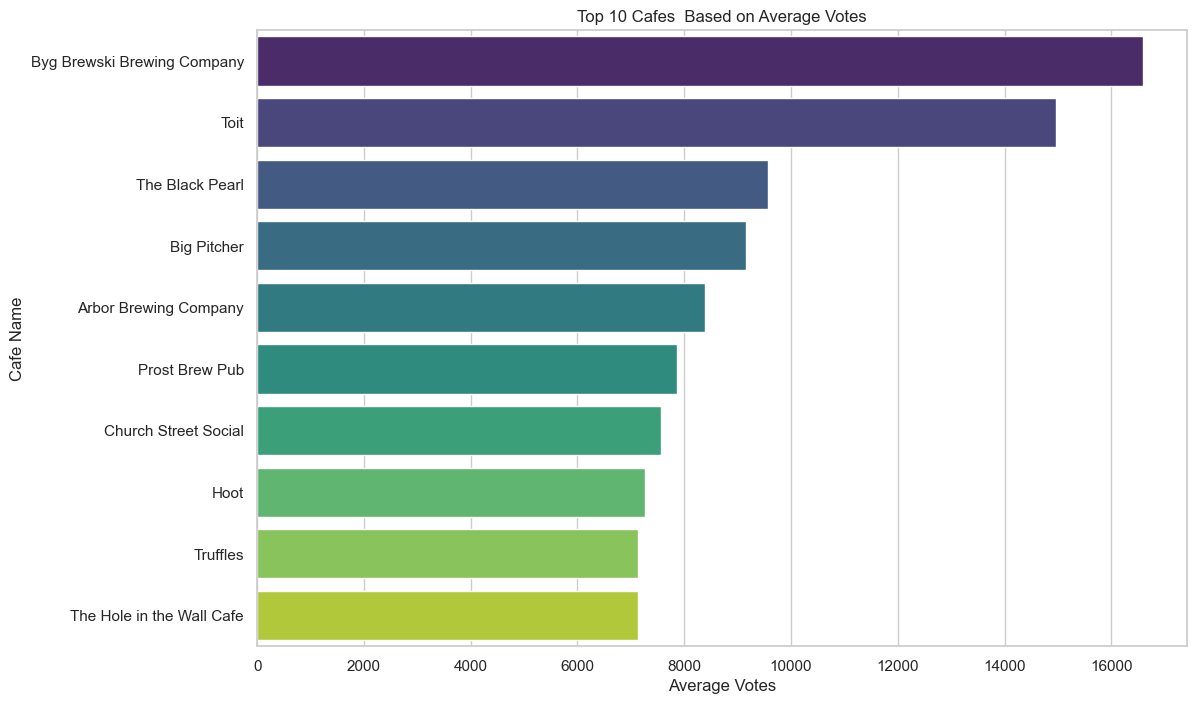

In [13]:
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='votes', y='name', data=top_cafes, palette='viridis')

plt.title('Top 10 Cafes  Based on Average Votes')
plt.xlabel('Average Votes')
plt.ylabel('Cafe Name')

plt.show()

# # Which locations have the highest average number of votes?


In [14]:
average_votes_by_location = df.groupby('location')['votes'].mean().reset_index(name='average_votes')

In [15]:
average_votes_by_location

,location,average_votes
0,BTM,120.877440
1,Banashankari,179.220751
2,Banaswadi,53.700301
3,Bannerghatta Road,134.403067
4,Basavanagudi,138.770468
...,...,...
88,West Bangalore,185.000000
89,Whitefield,217.737407
90,Wilson Garden,29.841463
91,Yelahanka,31.500000


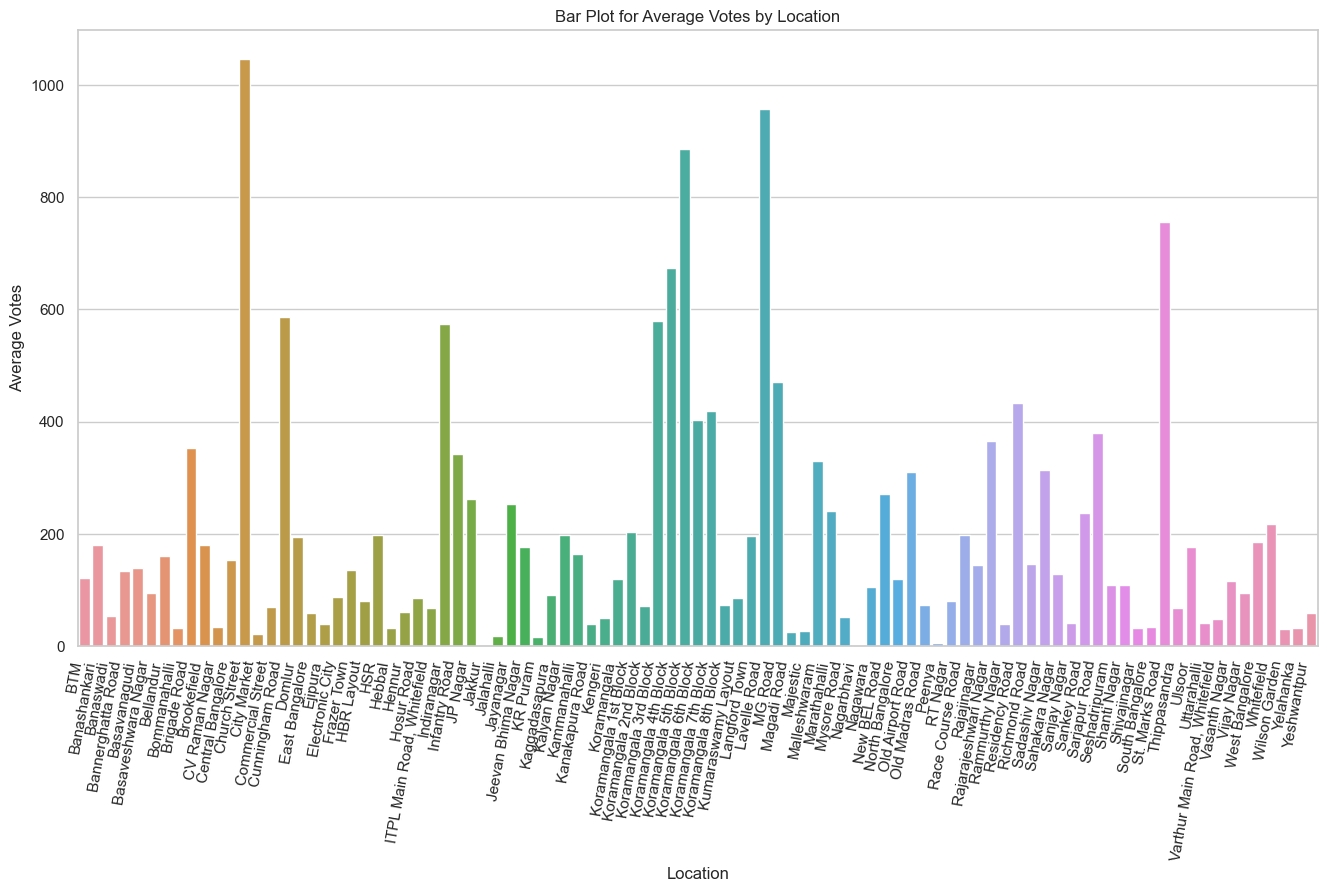

In [16]:
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(16, 8))
sns.barplot(x='location', y='average_votes', data=average_votes_by_location)

plt.title('Bar Plot for Average Votes by Location')
plt.xlabel('Location')
plt.ylabel('Average Votes')
plt.xticks(rotation=80, ha='right')

plt.show()

In [17]:
top_10_popular_restaurants = after_dropping_duplicate.groupby("name")[['votes']].mean().sort_values(by="votes", ascending=False).head(10).reset_index()


In [18]:
top_10_popular_restaurants

,name,votes
0,Byg Brewski Brewing Company,16588.500000
1,Toit,14956.000000
2,The Black Pearl,9562.333333
3,Big Pitcher,9164.500000
4,Arbor Brewing Company,8396.545455
5,Prost Brew Pub,7861.666667
6,Church Street Social,7561.727273
7,Hoot,7257.000000
8,Truffles,7139.952381
9,The Hole in the Wall Cafe,7124.875000


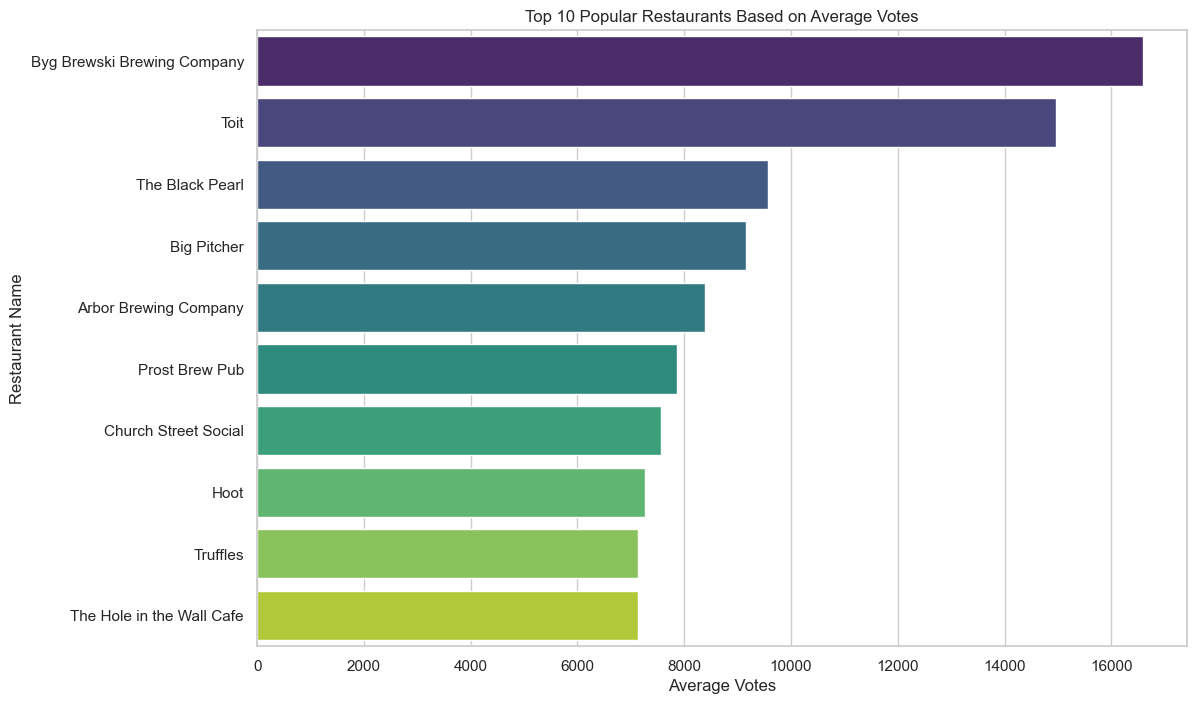

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x='votes', y='name', data=top_10_popular_restaurants, palette='viridis')
plt.xlabel('Average Votes')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Popular Restaurants Based on Average Votes')
plt.show()


In [20]:
dish_groups =after_dropping_duplicate .groupby('dish_liked')['name'].count().reset_index()

In [21]:
dish_groups 

,dish_liked,name
0,"Aam Panna, Pasta, Biryani, Paneer Tikka, Chine...",2
1,"Aam Panna, Pasta, Chinese Bhel, Biryani, Panee...",1
2,"Aam Panna, Pasta, Paneer Tikka, Biryani, Pav B...",1
3,Afghan Chicken,2
4,"Akki Rottis, Neer Dosa",4
...,...,...
5266,"Wood Fire Pizza, Cocktails, Ferrero Rocher Sha...",5
5267,"Zinger Burger, Burgers, Popcorn Chicken",1
5268,"Zinger Burger, Crispy Chicken, Rice Bowl, Hot ...",1
5269,"Zinger Burger, French Fries, Choco Lash, Hot W...",1


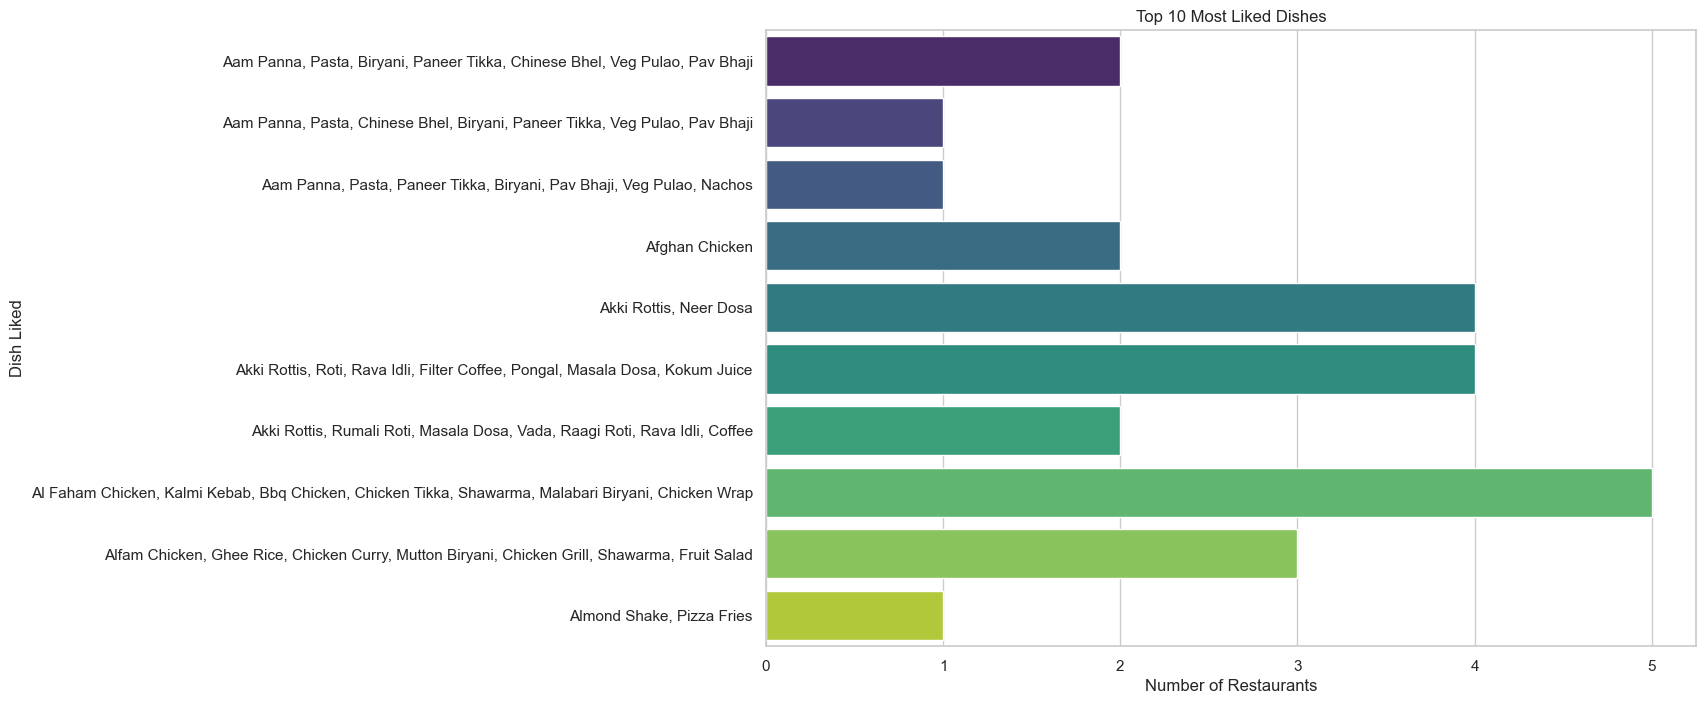

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='dish_liked', data=dish_groups.head(10), palette='viridis')
plt.title('Top 10 Most Liked Dishes')
plt.xlabel('Number of Restaurants')
plt.ylabel('Dish Liked')
plt.show()

In [23]:
sorted_dish_groups = dish_groups.sort_values(by='name', ascending=False)


In [24]:
sorted_dish_groups

,dish_liked,name
266,Biryani,136
990,Chicken Biryani,51
3497,Paratha,46
2148,Friendly Staff,45
5163,Waffles,44
...,...,...
4084,"Rabri, Shahi Tukda, Paratha, Fruit Custard, Kh...",1
4083,"Rabri, Sea Food, Mocktails, Paan Ice Cream, Fi...",1
4082,"Rabri, Peri Peri Chicken, Phirni, Vegetable Bi...",1
1920,"Donut, Chocolate Truffle, Rainbow Cake, Cup Ca...",1


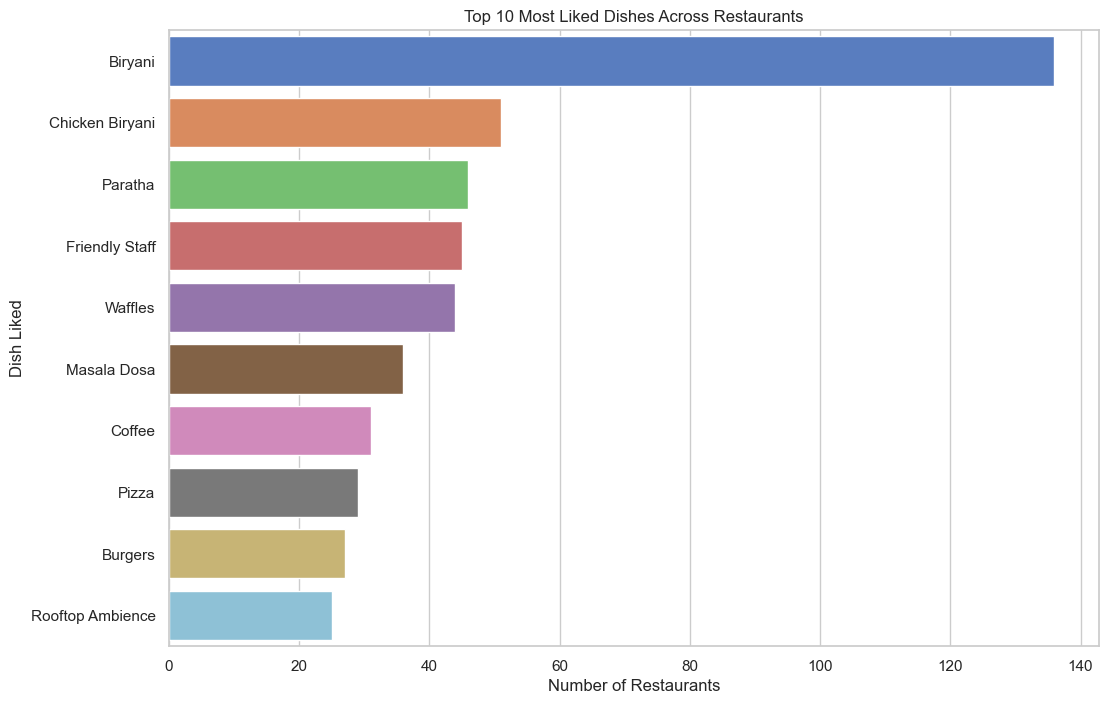

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='dish_liked', data=sorted_dish_groups.head(10), palette='muted')
plt.xlabel('Number of Restaurants')
plt.ylabel('Dish Liked')
plt.title('Top 10 Most Liked Dishes Across Restaurants')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


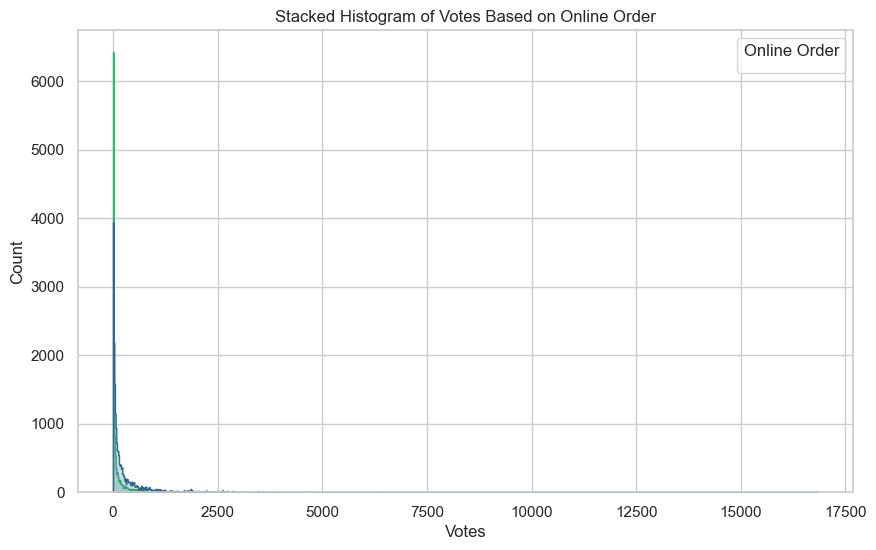

In [30]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(after_dropping_duplicate, x='votes', hue='online_order', element='step', stat='count', common_norm=False, palette='viridis')

plt.title('Stacked Histogram of Votes Based on Online Order')
plt.xlabel('Votes')
plt.ylabel('Count')
plt.legend(title='Online Order')

plt.show()

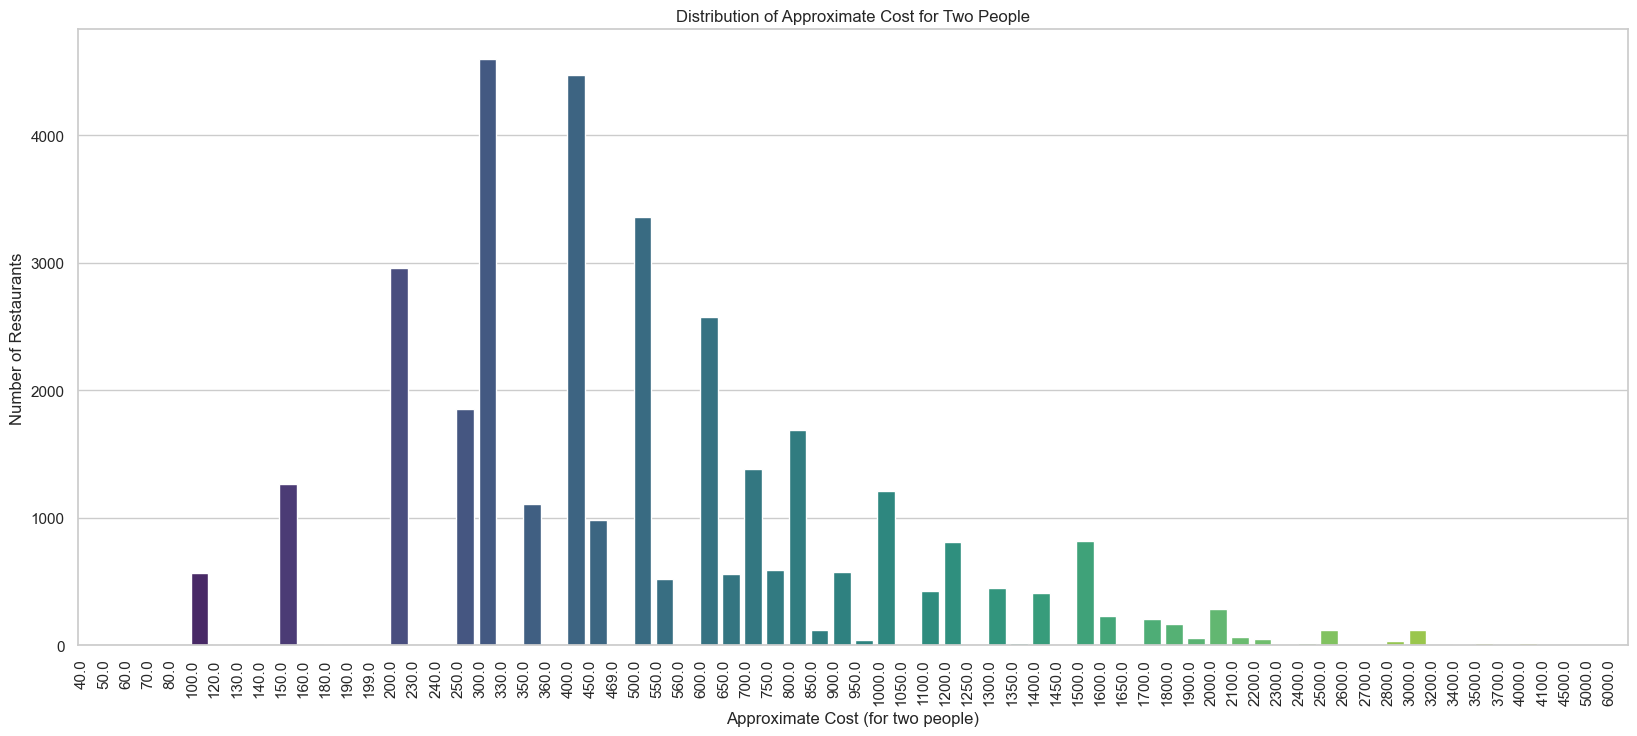

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))
sns.countplot(x='approx_cost(for two people)', data=after_dropping_duplicate, palette='viridis')
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Approximate Cost (for two people)')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90, ha='right')
plt.show()


In [42]:
location_counts = after_dropping_duplicate['location'].value_counts()


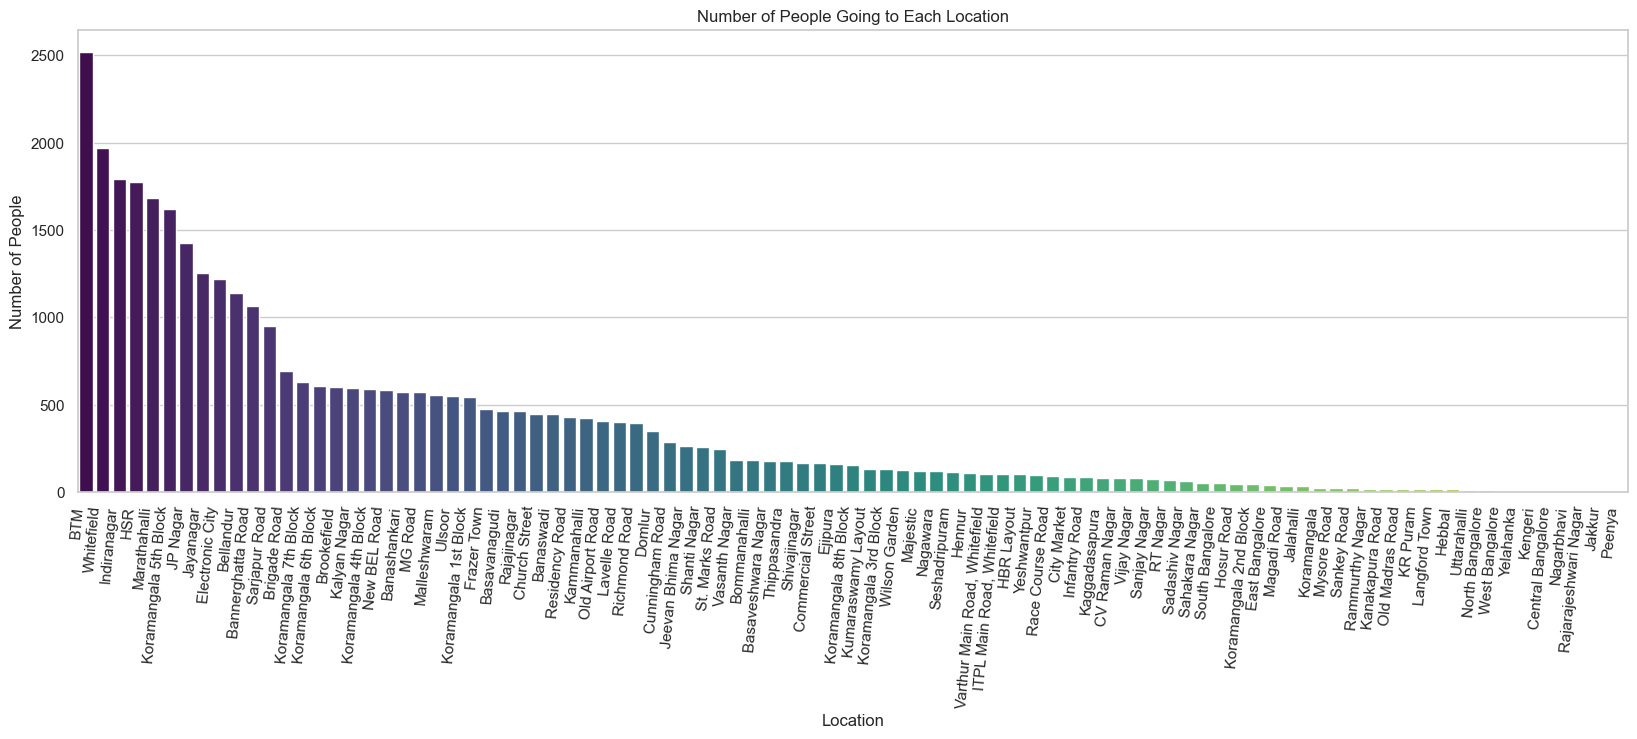

In [43]:
sns.set(style="whitegrid")

plt.figure(figsize=(20, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Number of People Going to Each Location')
plt.xlabel('Location')
plt.ylabel('Number of People')
plt.xticks(rotation=85, ha='right')
plt.show()

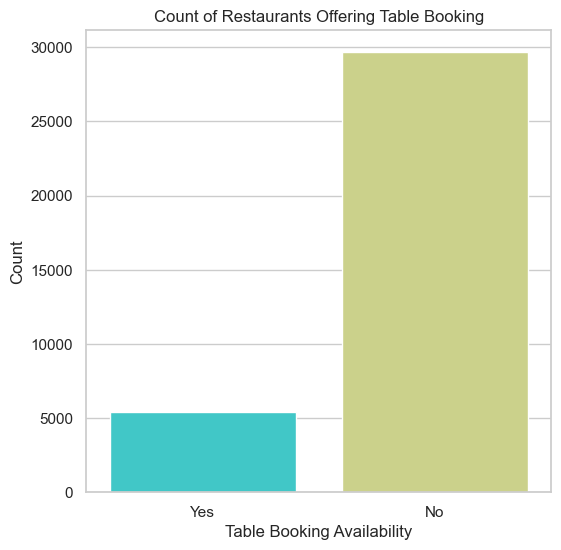

In [44]:
plt.figure(figsize=(6, 6))
sns.countplot(x='book_table', data=after_dropping_duplicate, palette='rainbow')
plt.title('Count of Restaurants Offering Table Booking')
plt.xlabel('Table Booking Availability')
plt.ylabel('Count')
plt.show()

In [45]:
grouped_by_name_votes = after_dropping_duplicate.groupby("name")[['votes']].mean().sort_values(by="votes", ascending=False).head(10).reset_index()


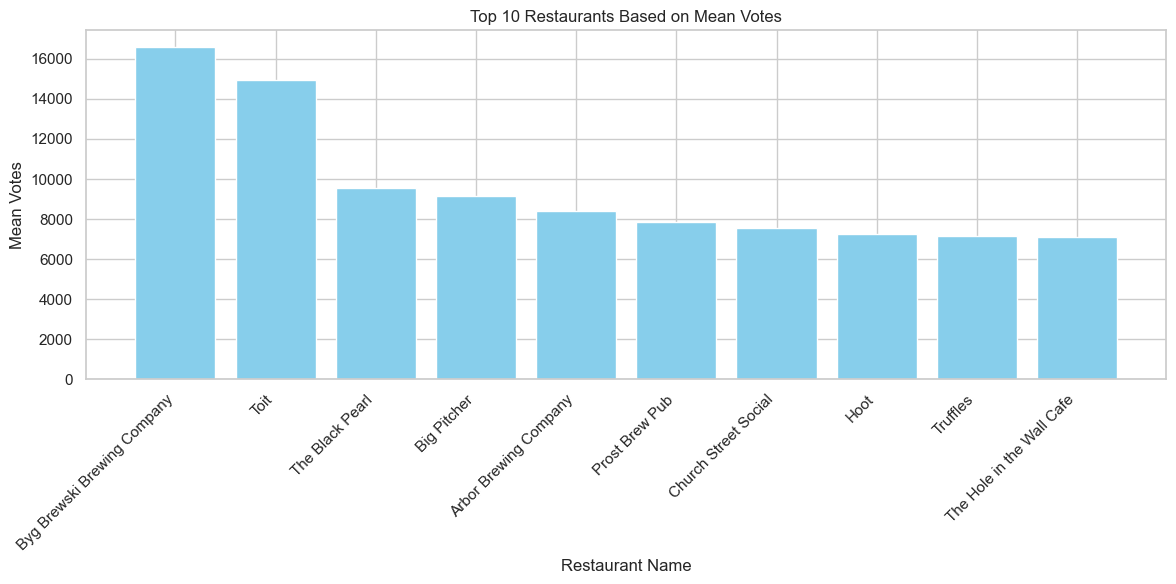

In [46]:
plt.figure(figsize=(12, 6))

plt.bar(grouped_by_name_votes['name'][:10], grouped_by_name_votes['votes'][:10], color='skyblue')

plt.xlabel('Restaurant Name')
plt.ylabel('Mean Votes')
plt.title('Top 10 Restaurants Based on Mean Votes')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [47]:
delivering_restaurants = after_dropping_duplicate[after_dropping_duplicate['online_order'] == 'Yes']


In [ ]:
delivering_restaurants

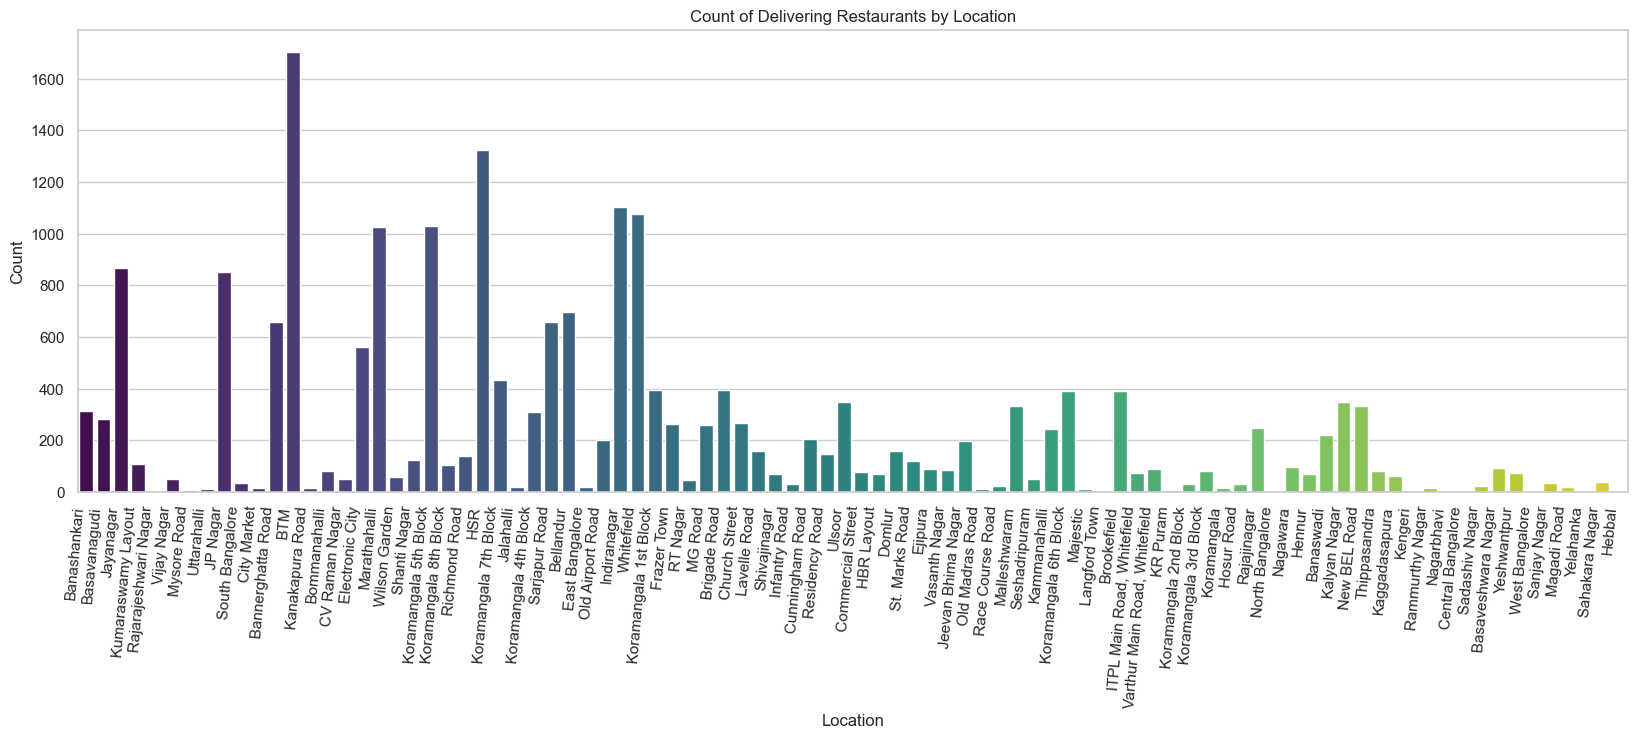

In [49]:
sns.set(style="whitegrid")

plt.figure(figsize=(20, 6))
sns.countplot(x='location', data=delivering_restaurants, palette='viridis')

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of Delivering Restaurants by Location')

plt.xticks(rotation=85, ha='right')

plt.show()

In [50]:
grouped_votes_by_location = df.groupby('location')['votes'].agg(['mean', 'sum']).reset_index()


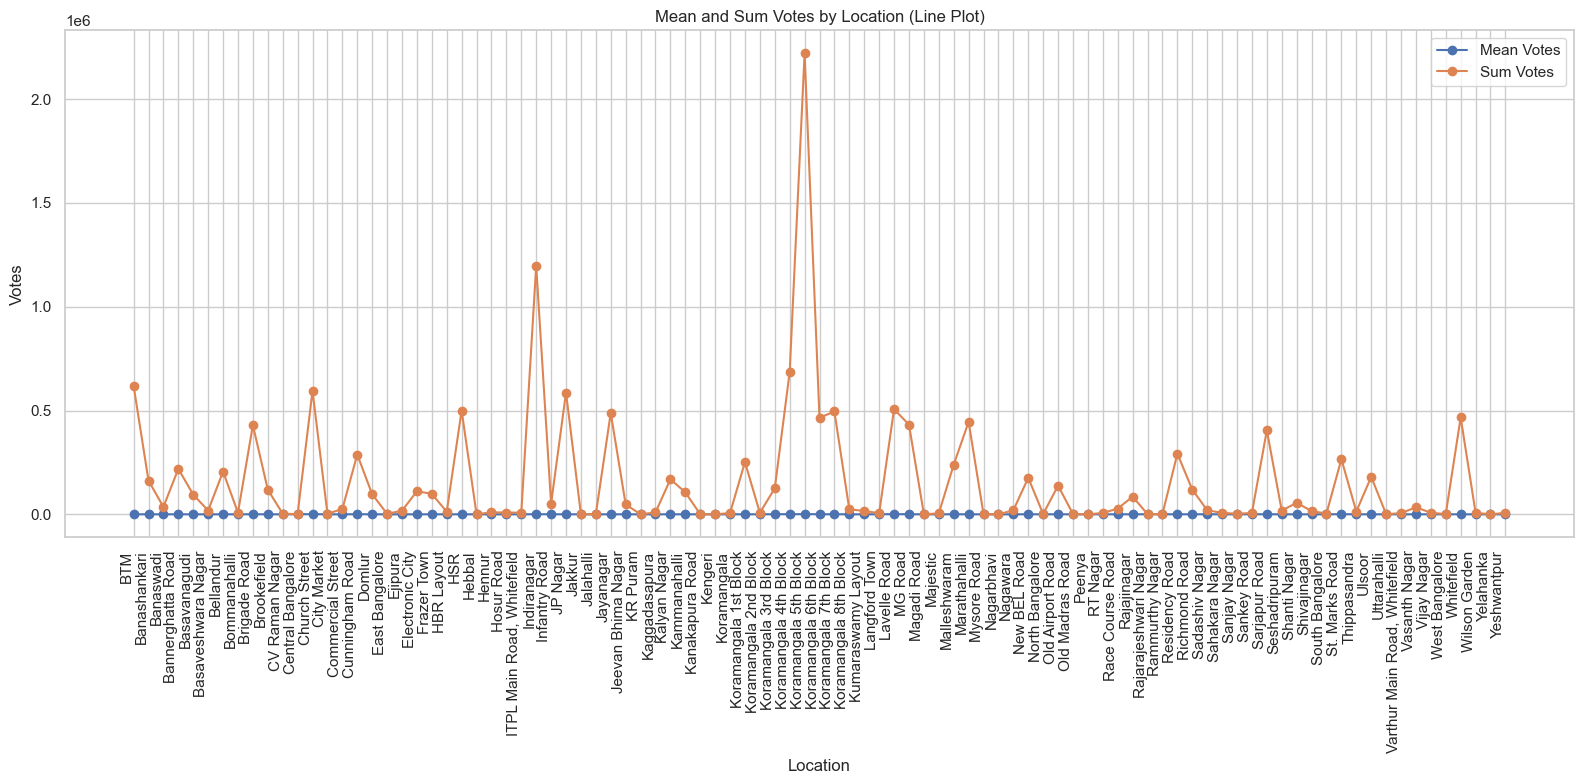

In [51]:
plt.figure(figsize=(16, 8))

plt.plot(grouped_votes_by_location['location'], grouped_votes_by_location['mean'], label='Mean Votes', marker='o')

plt.plot(grouped_votes_by_location['location'], grouped_votes_by_location['sum'], label='Sum Votes', marker='o')

plt.xlabel('Location')
plt.ylabel('Votes')
plt.title('Mean and Sum Votes by Location (Line Plot)')

plt.xticks(rotation=90, ha='right')

plt.legend()

plt.tight_layout()
plt.show()

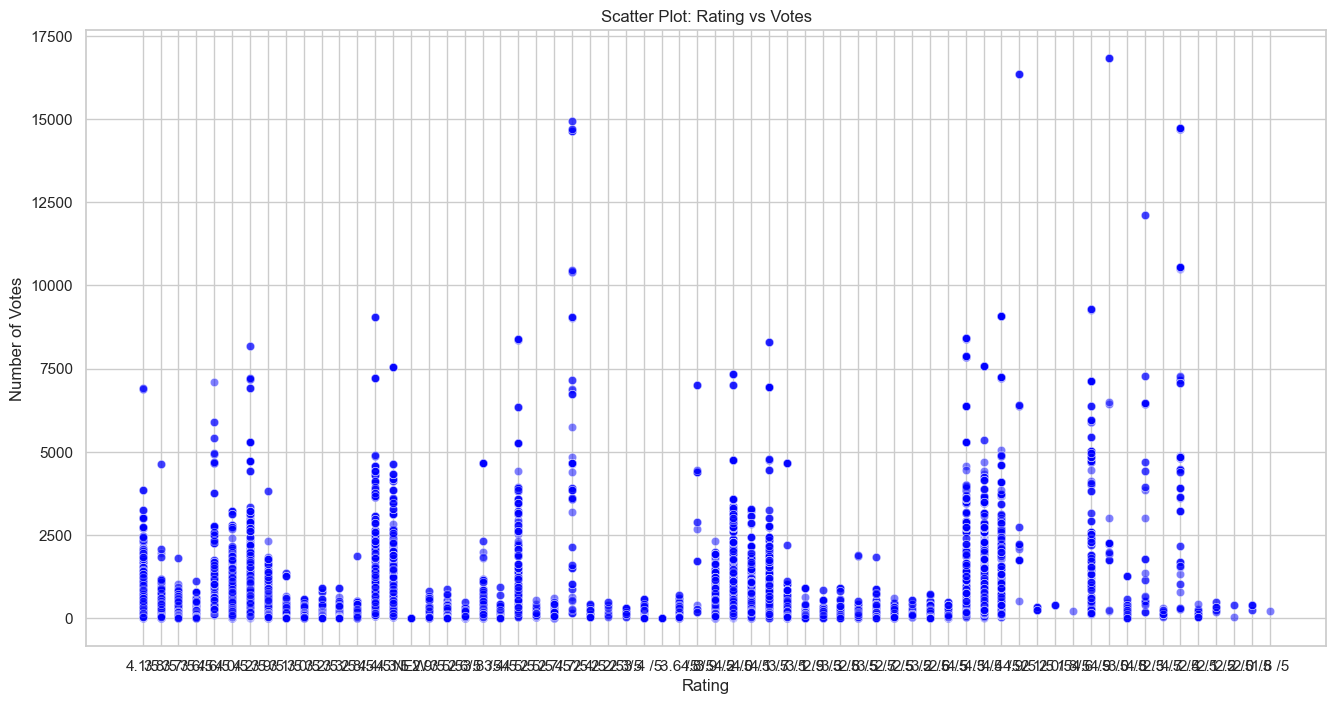

In [63]:
 sns.set(style="whitegrid")

plt.figure(figsize=(16, 8))
sns.scatterplot(x='rate', y='votes', data=after_dropping_duplicate, alpha=0.5, color='blue')
plt.title('Scatter Plot: Rating vs Votes')
plt.xlabel('Rating')
plt.ylabel('Number of Votes')

plt.show()

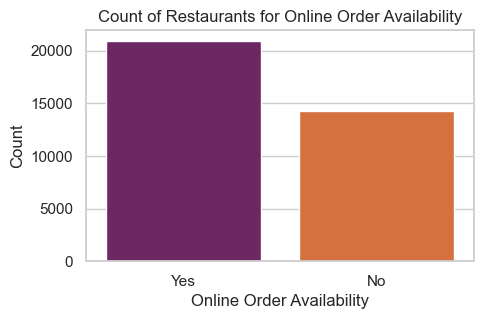

In [77]:
plt.figure(figsize=(5, 3))
sns.countplot(x='online_order', data=after_dropping_duplicate, palette='inferno')
plt.title('Count of Restaurants for Online Order Availability')
plt.xlabel('Online Order Availability')
plt.ylabel('Count')
plt.show()

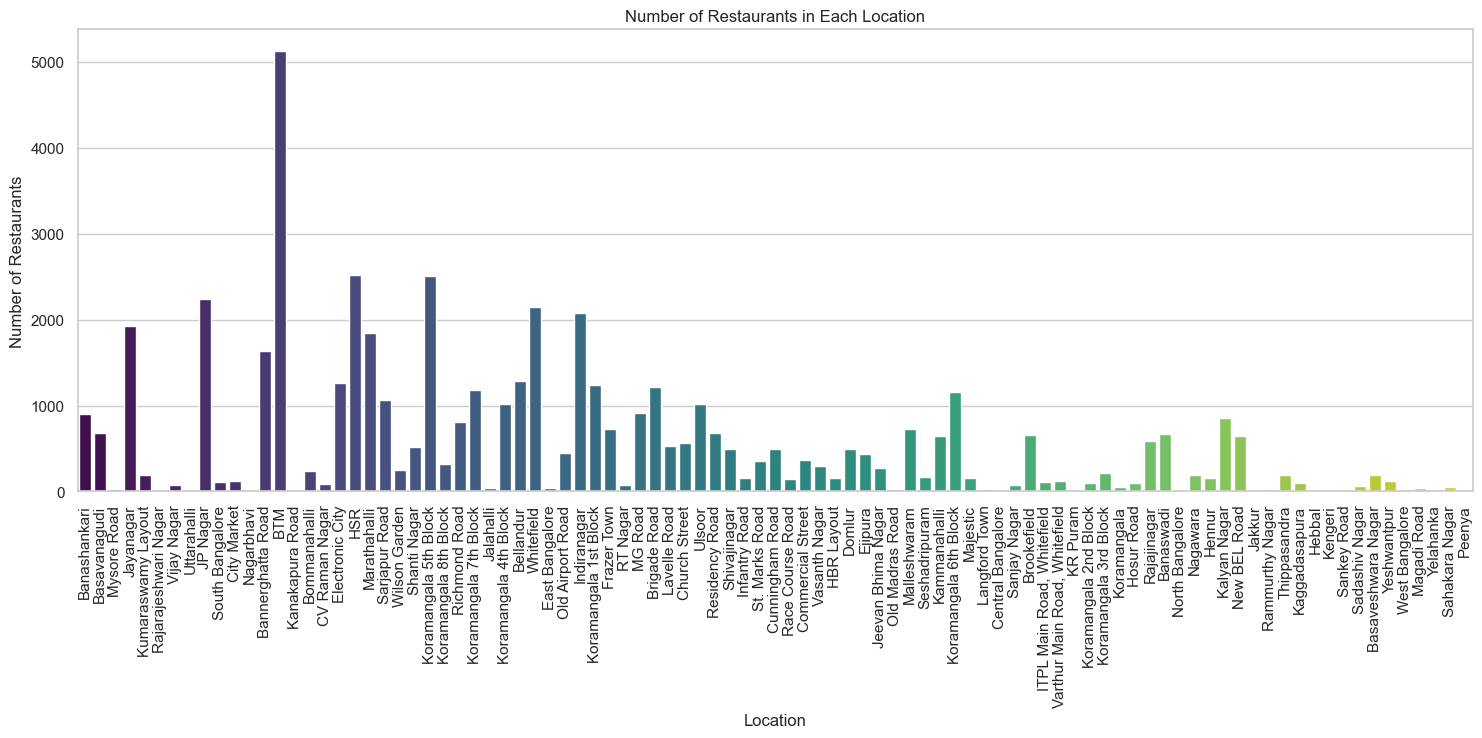

In [78]:
plt.figure(figsize=(18, 6))
sns.countplot(x='location', data=df, palette='viridis')
plt.title('Number of Restaurants in Each Location')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()